# Содержание

[Задание](#Задание)

---

[Импорт зависимостей](#Импорт-зависимостей)

---

[Чтение файла](#Чтение-файла)

[Попытка чтения файла в формате CSV](#Попытка-чтения-файла-в-формате-CSV)

[Попытка чтения файла в формате XLSX](#Попытка-чтения-файла-в-формате-XLSX)

---

[Получение информации о данных](#Получение-информации-о-данных)

[Основная информация](#Основная-информация)

[Информация о столбцах](#Информация-о-столбцах)

[Количество отсутствующие значения](#Количество-отсутствующие-значения)

---

[Дубликаты](#Дубликаты)

[Поиск дубликатов](#Поиск-дубликатов)

[Удаление дубликатов](#Удаление-дубликатов)

---

[Выбор вида спорта](#Выбор-вида-спорта)

[Получение выборки по данному виду спорта](#Получение-выборки-по-данному-виду-спорта)

---

[Выбросы](#Выбросы)

[Пол](#Пол)

[Возраст](#Возраст)

[Рост](#Рост)

[Вес](#Вес)

[Команда](#Команда)

[НОК](#НОК)

[Игра](#Игра)

[Год](#Год)

[Сезон](#Сезон)

[Город](#Город)

[Спорт](#Спорт)

[Событие](#Событие)

[Медаль](#Медаль)

---

[Коррекци противоречивых данных](#Коррекци-противоречивых-данных)

[Возраст](#Возраст)

[Рост](#Рост)

[Вес](#Вес)

---

[Обработка пропусков](#Обработка-пропусков)

[Возраст](#Возраст)

[Рост](#Рост)

[Вес](#Вес)

[Медали](#Медали)

---

[Цифровизация данных](#Цифровизация-данных)

---

[Корреляция](#Корреляция)

---

[Создание тестовой и тренировочной выборки](#Создание-тестовой-и-тренировочной-выборки)

[Модель](#Модель)

---

[Предсказание](#Предсказание)

---

[Ответы на вопросы](#Ответы-на-вопросы)


# Задание

Цель работы: изучение современных компьютерных технологий для подготовки больших данных к прогнозному анализу, в рамках курса «Управление данными».

Задание 1:

В рамках практической работы необходимо исследовать представленный data set на ошибки (описки), на отсутствие данных («missing»), на выбросы («outliers»), на наличие дублирующих строк (наблюдений), на наличие мультиколлинеарности объясняющих переменных (атрибутов).
Перед тем как приступать к подготовке («чистке») исходных данных желательно провести процедуру «описательная статистика» data set athlete_events1.xlsx для всех входящих переменных (15 переменных). Это поможет дать общее представление об исходных данных и определиться с входными данными и целевой переменной. В этом смысле будет полезным ответить на контрольные вопросы, приведенные нижка.
.


Задание 2:

1) Ответить на контрольные вопросы, приведенного data set (11 вопросов)
2)  Отметить и записать в приведенную таблицу название входных переменных и их формат
3)  Заполнить таблицу описательных статистик для числовых и текстовых переменны
4)  Построить прогнозную модель победителя Олимпиады 2016 года (рост, вес, возраст), используя исторические данные и сравнить с реальной картино)

Предлагается построить прогнозные модели победителей Олимпийских игр 2016 г. по следующим спортивным дисципли на:	

Мужчины легкая атлетика:
100м, 200м, 400м, 800м, 1500м, 5000м, 10000м, марафон, прыжки в высоту, прыжки в длину, метание копья, метание диска.

Женщины легкая атлетика:
100м, 200м, 400м, 800м, 1500м, 5000м, 10000м, марафон, прыжки в высоту, прыжки в длину, метание копья, метание диска.


# Импорт зависимостей

In [1]:
import pandas as pd #Для анализа таблиц
import matplotlib.pyplot as plt #Для созздание графиков
from matplotlib.pyplot import figure #Для создания граиков
import seaborn as sns #Для построения хитмапов

# Чтение файла

## Попытка чтения файла в формате CSV

In [2]:
def read_csv(filepath: str):
    return pd.read_csv(filepath)

In [3]:
df = pd.read_csv("./athlete_events.csv", sep =",")
df.head()

,"ID,""Name"",""Sex"",""Age"",""Height"",""Weight"",""Team"",""NOC"",""Games"",""Year"",""Season"",""City"",""Sport"",""Event"",""Medal"";;;;;;;;;;;"
0,"1,""A Dijiang"",""M"",24,180,80,""China"",""CHN"",""199..."
1,"2,""A Lamusi"",""M"",23,170,60,""China"",""CHN"",""2012..."
2,"3,""Gunnar Nielsen Aaby"",""M"",24,NA,NA,""Denmark""..."
3,"4,""Edgar Lindenau Aabye"",""M"",34,NA,NA,""Denmark..."
4,"5,""Christine Jacoba Aaftink"",""F"",21,185,82,""Ne..."


Не удаеться получить данные в формате CSV

## Попытка чтения файла в формате XLSX

In [4]:
def parse_excel(filepath: str):
    dfs = []
    xlsx = pd.ExcelFile(filepath)

    for sheet in xlsx.sheet_names:
        dfs.append(xlsx.parse(sheet))
        
    return dfs

In [5]:
df_list = parse_excel("./athlete_events.xlsx")
main_df = df_list[0]
main_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Получение информации о данных

## Основная информация

* ID - Уникальный номер атлета;
* Name - Имя атлета;
* Sex - M или F;
* Age - Integer;
* Height - В сантиметрах;
* Weight - В килограммах;
* Team - Название команды;
* NOC - National Olympic Committee;
* Games - Год и сезон;
* Year - Год;
* Season - Summer или Winter;
* City - Город проведения;
* Sport - Наименование вида спорта;
* Event - Событие;
* Medal - Gold, Silver, Bronze, или NA.

In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Информация о столбцах

In [7]:
main_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

## Количество отсутствующие значения

In [8]:
main_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

# Дубликаты

Дубликаты - это одинаковые данные (записи). Дубликаты приводят к избыточности, увеличивают объем выборки, при этом не повышая информативность данных.

Наличие одинаковых наблюдений влияет на коэффициенты 
регрессии, увеличивая дисперсию модели, поэтому дублирующи 
наблюдения должны быть найдены и удалены из аналиа


## Поиск дубликатов

In [9]:
main_df[main_df.duplicated()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269995,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


## Удаление дубликатов

In [10]:
del_dup_main_df = main_df.drop_duplicates()

In [11]:
del_dup_main_df.shape

(269731, 15)

In [12]:
main_df.shape

(271116, 15)

Как видно из размеров данных, то выборка данных с удаленными дубликатами меньше, чем основная выборка.

In [13]:
269731 - 271116

-1385

# Выбор вида спорта

В данном заданиии  необходимо выбрать вид спорта и сделать по нему предсказательную модель.

Я выбрал вид спорта - Speed Skating. Спидскейтинг (speed skating), а точнее инлайн спидскейтинг – это скоростное катание на роликовых коньках без использования силы гравитации для ускорения (гравитацией пользуется отдельная дисциплина – даунхилл на роликовых коньках). Это безусловно самый массовый вид роллер спорта, который должен войти в программу летних олимпийских игр.

Правила участия в олимпийских играх по спидскейтингу могут включать следующие положения:

1. Квалификация: Участники должны пройти отборочные соревнования и соответствовать определенным критериям, установленным Международным союзом конькобежного спорта (ISU).

2. Участники: В соревнованиях могут принимать участие спортсмены, представляющие свои страны и имеющие гражданство этой страны.

3. Возраст: Участники должны быть старше определенного возраста, который может быть установлен организаторами игр или ISU.

4. Экипировка: Участники должны использовать соответствующую экипировку, включая коньки, шлем, защитные очки, перчатки и другие необходимые средства защиты.

5. Допустимые дистанции: В зависимости от программы Олимпийских игр, участники могут соревноваться на различных дистанциях, таких как 500 м, 1000 м, 1500 м, 5000 м, 10000 м и командные эстафеты.

6. Правила гонки: Участники должны соблюдать правила и регламенты, установленные ISU, включая правила старта, обгонов, финишей и другие аспекты гонки.

7. Дисквалификация: Участник может быть дисквалифицирован за нарушение правил или использование запрещенных веществ.

8. Антидопинговый контроль: Участники могут быть подвергнуты антидопинговому контролю для обеспечения честности и чистоты соревнований.

9. Нарушение правил: В случае нарушения правил, участник может быть дисквалифицирован, лишен медалей или оштрафован в соответствии с решением организаторов игр или ISU.

10. Этика и спортивное поведение: Участники должны соблюдать высокие стандарты этики и спортивного поведения, проявлять уважение к соперникам, судьям и зрителям.


В интернете нет точной  информации о возрасте участников, поэтому будет смотреть данные и обрабатывать их по конкретной ситуации.

## Получение выборки по данному виду спорта

In [14]:
speed_skating_df = del_dup_main_df[del_dup_main_df['Sport'] == 'Speed Skating']
speed_skating_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271094,135559,Pawe Jan Zygmunt,M,25.0,182.0,79.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,"Speed Skating Men's 1,500 metres",NaN
271095,135559,Pawe Jan Zygmunt,M,25.0,182.0,79.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,"Speed Skating Men's 5,000 metres",NaN
271096,135559,Pawe Jan Zygmunt,M,29.0,182.0,79.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Men's 5,000 metres",NaN
271097,135559,Pawe Jan Zygmunt,M,29.0,182.0,79.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Men's 10,000 metres",NaN


# Выбросы

Выбросы в данных — это значения, которые сильно отличаются от большинства других значений в наборе данных. 

## Пол

In [15]:
speed_skating_df['Sex'].value_counts(normalize=True, dropna=False)

Sex
M    0.629254
F    0.370746
Name: proportion, dtype: float64

<Axes: xlabel='Sex'>

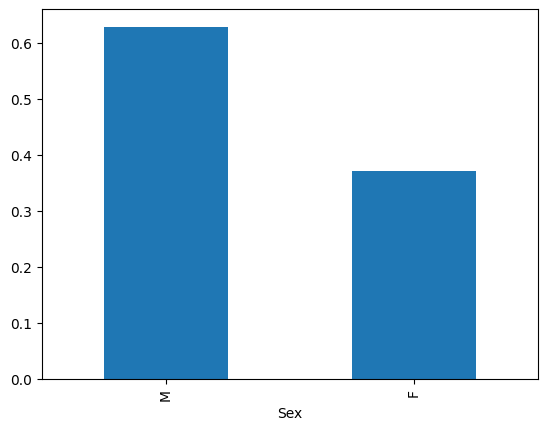

In [16]:
speed_skating_df['Sex'].value_counts(normalize=True, dropna=False).plot.bar()

## Возраст

In [17]:
speed_skating_df['Age'].value_counts(normalize=True, dropna=False)

Age
24.0    0.108320
23.0    0.098699
22.0    0.091751
21.0    0.090148
25.0    0.079993
26.0    0.072867
20.0    0.071798
27.0    0.068769
28.0    0.058258
19.0    0.047212
29.0    0.037235
30.0    0.029931
18.0    0.028862
31.0    0.026189
17.0    0.018707
32.0    0.014431
33.0    0.013896
34.0    0.009264
35.0    0.006414
16.0    0.005701
15.0    0.004098
NaN     0.003385
37.0    0.003207
14.0    0.002138
36.0    0.001960
38.0    0.001960
39.0    0.001425
40.0    0.000891
41.0    0.000713
46.0    0.000713
13.0    0.000356
42.0    0.000356
52.0    0.000356
Name: proportion, dtype: float64

<Axes: xlabel='Age'>

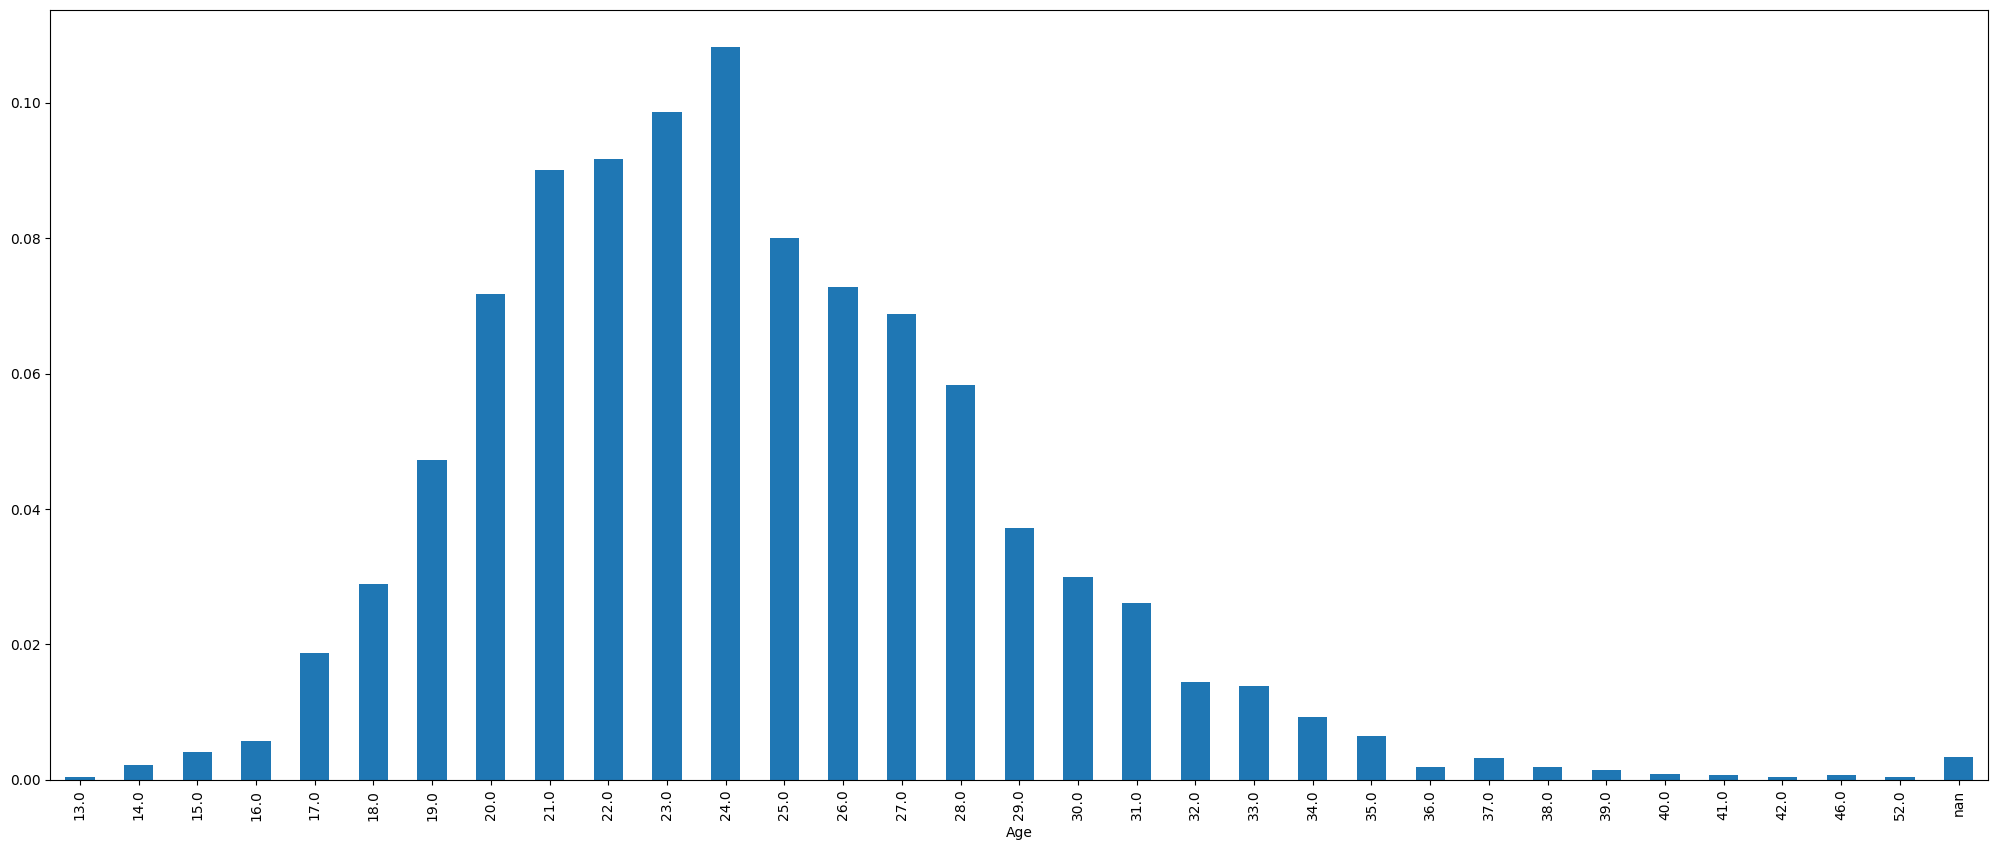

In [18]:
speed_skating_df['Age'].value_counts('Age', dropna=False).sort_index().plot.bar(figsize=(25,10))

По возрасту большой разброс значений. Однако для каждого вида спорта выделяют свой интервал возрастов. К этому моменту я вернусь чуть позже. Явных выбросов в данном параметре нет

## Рост

In [19]:
speed_skating_df['Height'].value_counts(normalize=True, dropna=False)

Height
NaN      0.194192
180.0    0.055585
170.0    0.046321
178.0    0.042402
167.0    0.041867
175.0    0.040620
168.0    0.038126
172.0    0.035097
183.0    0.034563
173.0    0.033850
182.0    0.029574
185.0    0.029396
171.0    0.025298
165.0    0.024586
174.0    0.022804
160.0    0.022270
162.0    0.021735
181.0    0.021023
164.0    0.017816
169.0    0.017459
190.0    0.017281
177.0    0.016747
163.0    0.016391
176.0    0.015143
184.0    0.014965
166.0    0.014253
189.0    0.013184
188.0    0.012649
186.0    0.011937
179.0    0.011402
187.0    0.010868
158.0    0.008017
159.0    0.007483
157.0    0.006414
161.0    0.004988
156.0    0.004632
153.0    0.004098
192.0    0.004098
193.0    0.002672
152.0    0.001425
155.0    0.001425
154.0    0.001247
197.0    0.001069
191.0    0.001069
199.0    0.000713
200.0    0.000356
149.0    0.000356
151.0    0.000178
203.0    0.000178
194.0    0.000178
Name: proportion, dtype: float64

<Axes: xlabel='Height'>

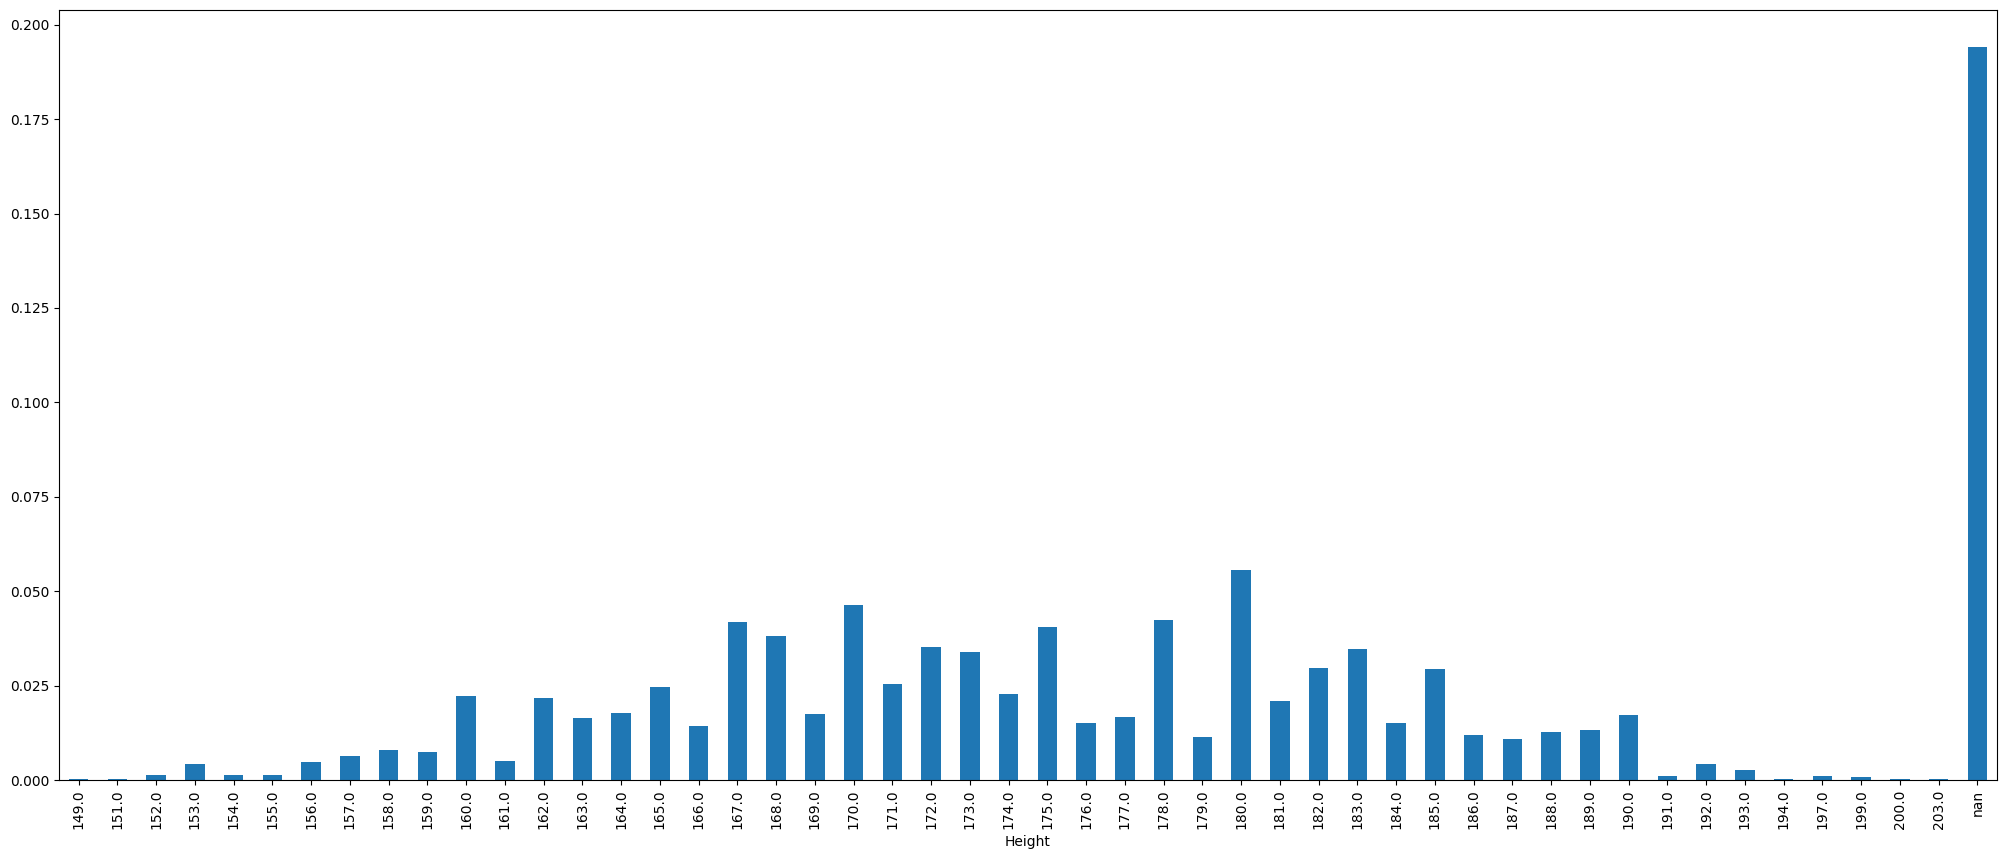

In [20]:
speed_skating_df['Height'].value_counts('Height', dropna=False).sort_index().plot.bar(figsize=(25,10))

Возможно для конкретного вида спорта также выделяют свои ограничения по росту. Явных выбросов нет

## Вес

In [21]:
speed_skating_df['Weight'].value_counts(normalize=True, dropna=False).sort_index()

Weight
46.0     0.001425
47.0     0.000713
48.0     0.002138
49.0     0.000356
50.0     0.004276
51.0     0.005345
52.0     0.008017
53.0     0.004098
54.0     0.005701
55.0     0.008908
56.0     0.016391
57.0     0.023695
58.0     0.029574
59.0     0.021557
59.5     0.001247
60.0     0.024051
61.0     0.026367
62.0     0.026367
63.0     0.024051
64.0     0.020132
65.0     0.030465
65.5     0.000356
66.0     0.029931
67.0     0.020310
68.0     0.022626
69.0     0.010868
70.0     0.041511
71.0     0.019241
72.0     0.033672
73.0     0.024764
74.0     0.017281
75.0     0.044896
75.5     0.000713
76.0     0.021379
77.0     0.020666
78.0     0.024942
79.0     0.016925
80.0     0.034741
81.0     0.008552
82.0     0.022626
83.0     0.008373
84.0     0.012471
85.0     0.023517
86.0     0.007839
87.0     0.003207
88.0     0.009264
89.0     0.001782
90.0     0.009086
91.0     0.000356
92.0     0.003029
93.0     0.003029
95.0     0.002138
96.0     0.001603
97.0     0.000891
100.0    0.000178
NaN

<Axes: xlabel='Weight'>

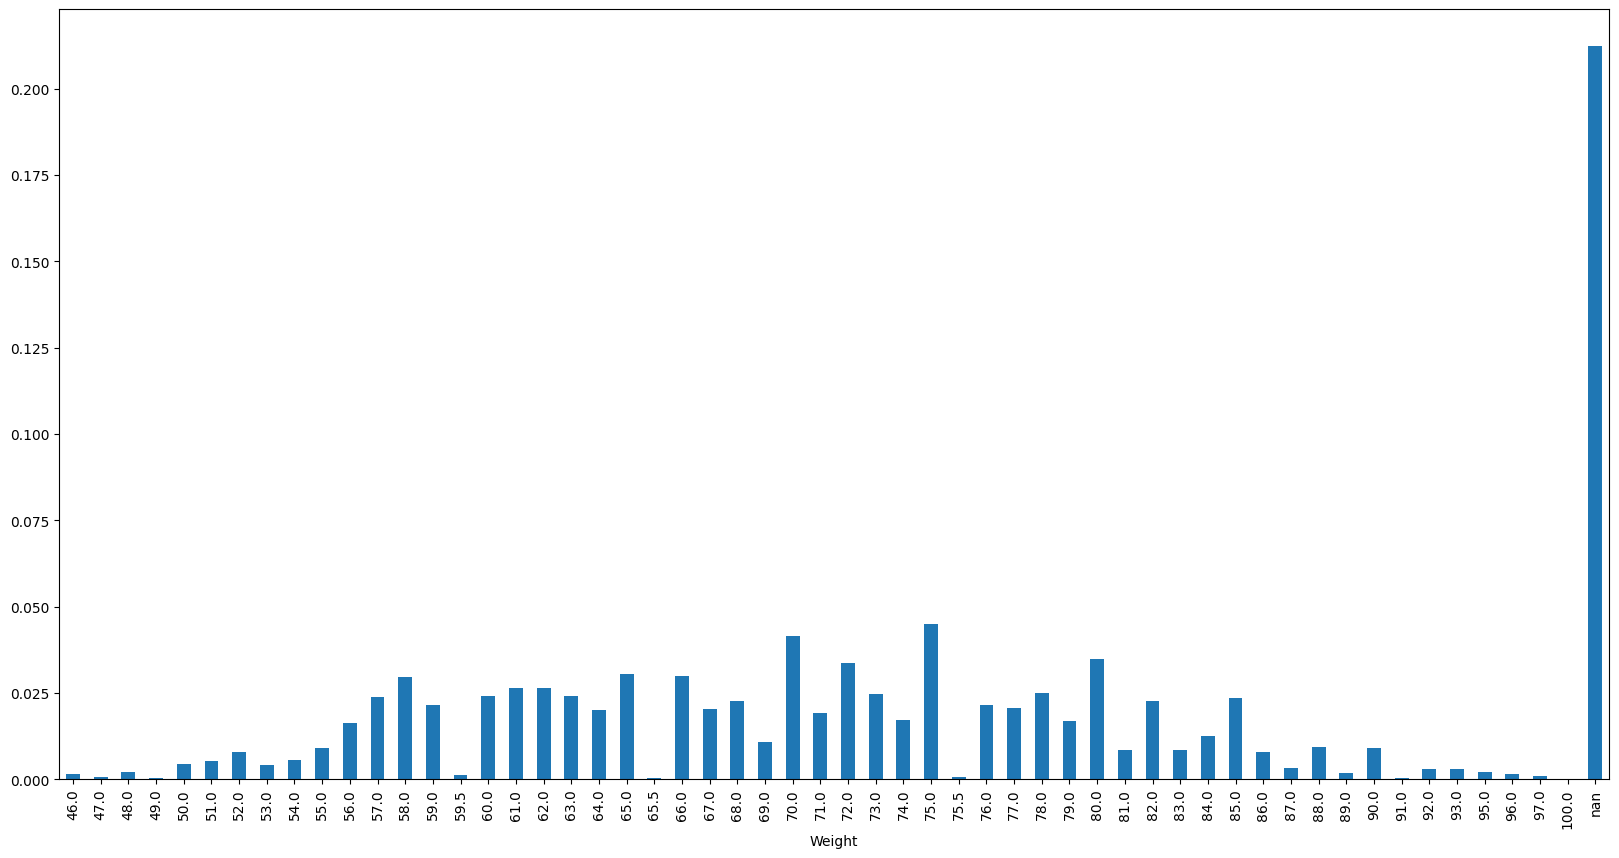

In [22]:
speed_skating_df['Weight'].value_counts('Weight', dropna=False).sort_index().plot.bar(figsize=(20,10))

Таже ситуация с конкретным видом спорта. Есть странные показателе, однако их я рассмотрю чуть позже.

## Команда

Данный параметр не имеет смысла анализировать, так как количество команд большое и может содержать всего 1 человека. Также этот парамет не влияет на дальнейший анализ. Его оставлю без изменений

## НОК

In [23]:
speed_skating_df['NOC'].value_counts(normalize=True, dropna=False).sort_index()

NOC
AUS    0.011224
AUT    0.029040
BEL    0.008908
BLR    0.004276
CAN    0.077142
CHN    0.031356
CZE    0.002494
DEN    0.001603
EST    0.001782
EUN    0.006414
FIN    0.043471
FRA    0.019419
FRG    0.013896
GBR    0.020310
GDR    0.017816
GER    0.051488
HUN    0.012115
ITA    0.032247
IVB    0.000356
JPN    0.084447
KAZ    0.012115
KOR    0.048281
LAT    0.004810
LTU    0.000713
MGL    0.004454
NED    0.089613
NOR    0.073045
NZL    0.000891
POL    0.026546
POR    0.000178
PRK    0.013362
ROU    0.009264
RUS    0.035988
SUI    0.006057
SWE    0.050062
TCH    0.006057
TPE    0.000356
UKR    0.003029
URS    0.039551
USA    0.101550
YUG    0.004276
Name: proportion, dtype: float64

## Игра

In [24]:
speed_skating_df['Games'].value_counts(normalize=True, dropna=False).sort_index()

Games
1924 Winter    0.019597
1928 Winter    0.018885
1932 Winter    0.012471
1936 Winter    0.024942
1948 Winter    0.027436
1952 Winter    0.025833
1956 Winter    0.031890
1960 Winter    0.044361
1964 Winter    0.051131
1968 Winter    0.049884
1972 Winter    0.043471
1976 Winter    0.044005
1980 Winter    0.052735
1984 Winter    0.058436
1988 Winter    0.058079
1992 Winter    0.063068
1994 Winter    0.056654
1998 Winter    0.059683
2002 Winter    0.059148
2006 Winter    0.067522
2010 Winter    0.065206
2014 Winter    0.065562
Name: proportion, dtype: float64

В целом, игры соответствуют действительности. Оставим их без изменений

## Год

In [25]:
speed_skating_df['Year'].value_counts(normalize=True, dropna=False).sort_index()

Year
1924    0.019597
1928    0.018885
1932    0.012471
1936    0.024942
1948    0.027436
1952    0.025833
1956    0.031890
1960    0.044361
1964    0.051131
1968    0.049884
1972    0.043471
1976    0.044005
1980    0.052735
1984    0.058436
1988    0.058079
1992    0.063068
1994    0.056654
1998    0.059683
2002    0.059148
2006    0.067522
2010    0.065206
2014    0.065562
Name: proportion, dtype: float64

## Сезон

In [26]:
speed_skating_df['Season'].value_counts(normalize=True, dropna=False).sort_index()

Season
Winter    1.0
Name: proportion, dtype: float64

## Город

In [27]:
speed_skating_df['City'].value_counts(normalize=True, dropna=False).sort_index()

City
Albertville               0.063068
Calgary                   0.058079
Chamonix                  0.019597
Cortina d'Ampezzo         0.031890
Garmisch-Partenkirchen    0.024942
Grenoble                  0.049884
Innsbruck                 0.095136
Lake Placid               0.065206
Lillehammer               0.056654
Nagano                    0.059683
Oslo                      0.025833
Salt Lake City            0.059148
Sankt Moritz              0.046321
Sapporo                   0.043471
Sarajevo                  0.058436
Sochi                     0.065562
Squaw Valley              0.044361
Torino                    0.067522
Vancouver                 0.065206
Name: proportion, dtype: float64

## Спорт

In [28]:
speed_skating_df['Sport'].value_counts(normalize=True, dropna=False).sort_index()

Sport
Speed Skating    1.0
Name: proportion, dtype: float64

<Axes: xlabel='Sport'>

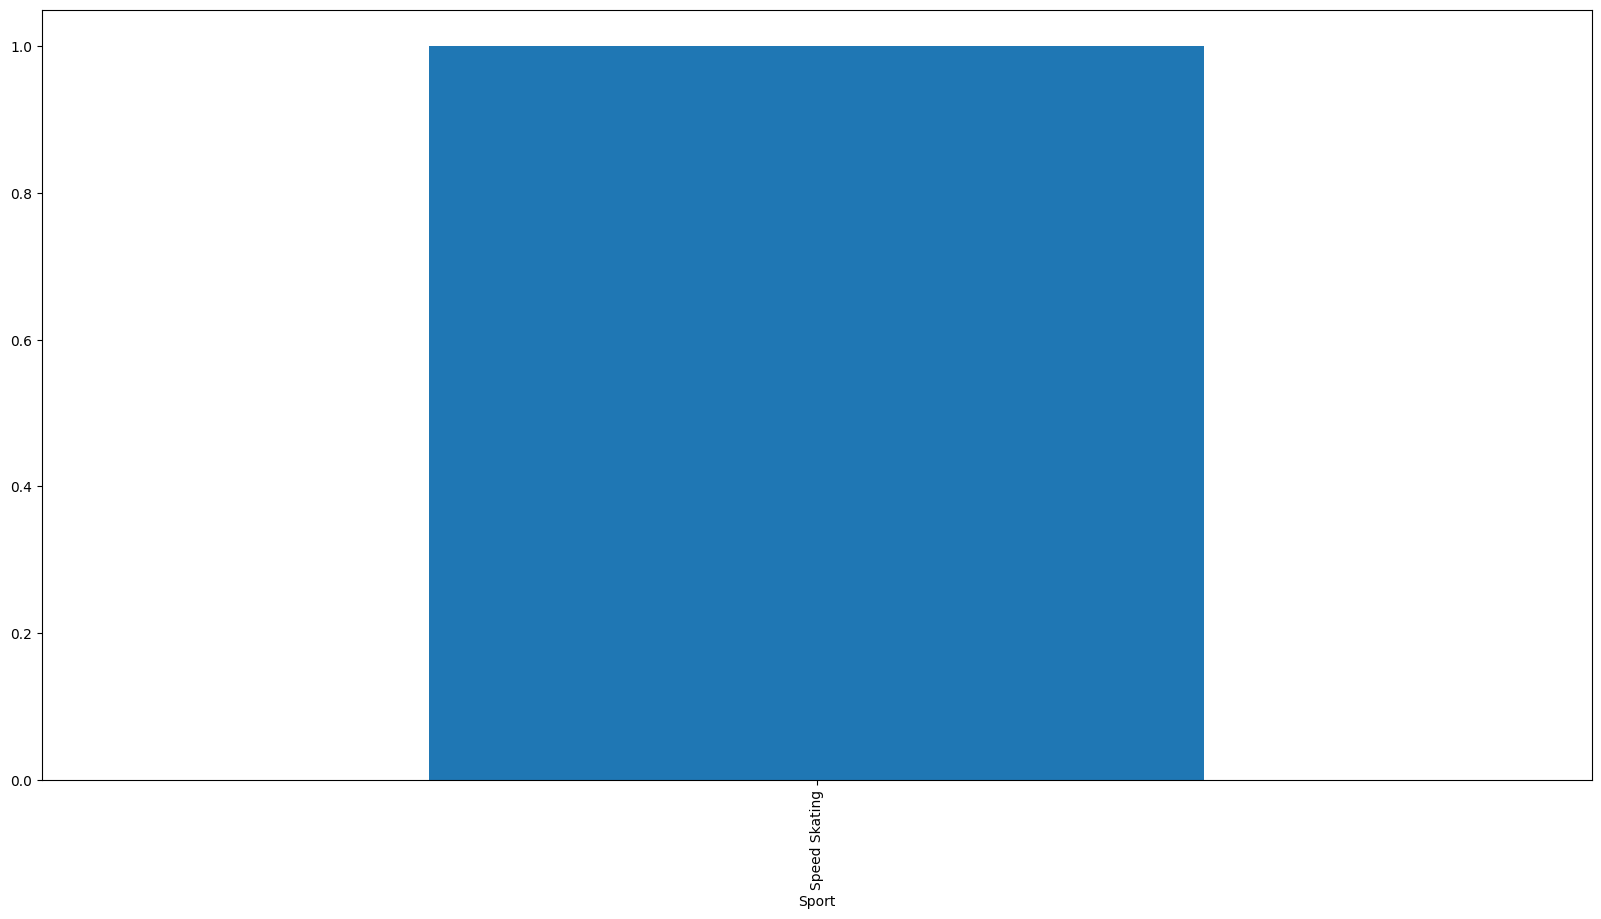

In [29]:
speed_skating_df['Sport'].value_counts(normalize=True, dropna=False).sort_index().plot.bar(figsize=(20,10))

## Событие

In [30]:
speed_skating_df['Event'].value_counts(normalize=True, dropna=False).sort_index()

Event
Speed Skating Men's 1,000 metres               0.080171
Speed Skating Men's 1,500 metres               0.157670
Speed Skating Men's 10,000 metres              0.090861
Speed Skating Men's 5,000 metres               0.130055
Speed Skating Men's 500 metres                 0.150009
Speed Skating Men's Allround                   0.004098
Speed Skating Men's Team Pursuit (8 laps)      0.016391
Speed Skating Women's 1,000 metres             0.088544
Speed Skating Women's 1,500 metres             0.084447
Speed Skating Women's 3,000 metres             0.072332
Speed Skating Women's 5,000 metres             0.025655
Speed Skating Women's 500 metres               0.083200
Speed Skating Women's Team Pursuit (6 laps)    0.016569
Name: proportion, dtype: float64

## Медаль

In [31]:
speed_skating_df['Medal'].value_counts(normalize=True, dropna=False).sort_index()

Medal
Bronze    0.033850
Gold      0.034384
Silver    0.035097
NaN       0.896668
Name: proportion, dtype: float64

# Коррекция противоречивых данных

## Возраст

In [32]:
speed_skating_df['Age'].value_counts('Age', dropna=False).sort_index()

Age
13.0    0.000356
14.0    0.002138
15.0    0.004098
16.0    0.005701
17.0    0.018707
18.0    0.028862
19.0    0.047212
20.0    0.071798
21.0    0.090148
22.0    0.091751
23.0    0.098699
24.0    0.108320
25.0    0.079993
26.0    0.072867
27.0    0.068769
28.0    0.058258
29.0    0.037235
30.0    0.029931
31.0    0.026189
32.0    0.014431
33.0    0.013896
34.0    0.009264
35.0    0.006414
36.0    0.001960
37.0    0.003207
38.0    0.001960
39.0    0.001425
40.0    0.000891
41.0    0.000713
42.0    0.000356
46.0    0.000713
52.0    0.000356
NaN     0.003385
Name: proportion, dtype: float64

<Axes: xlabel='Age'>

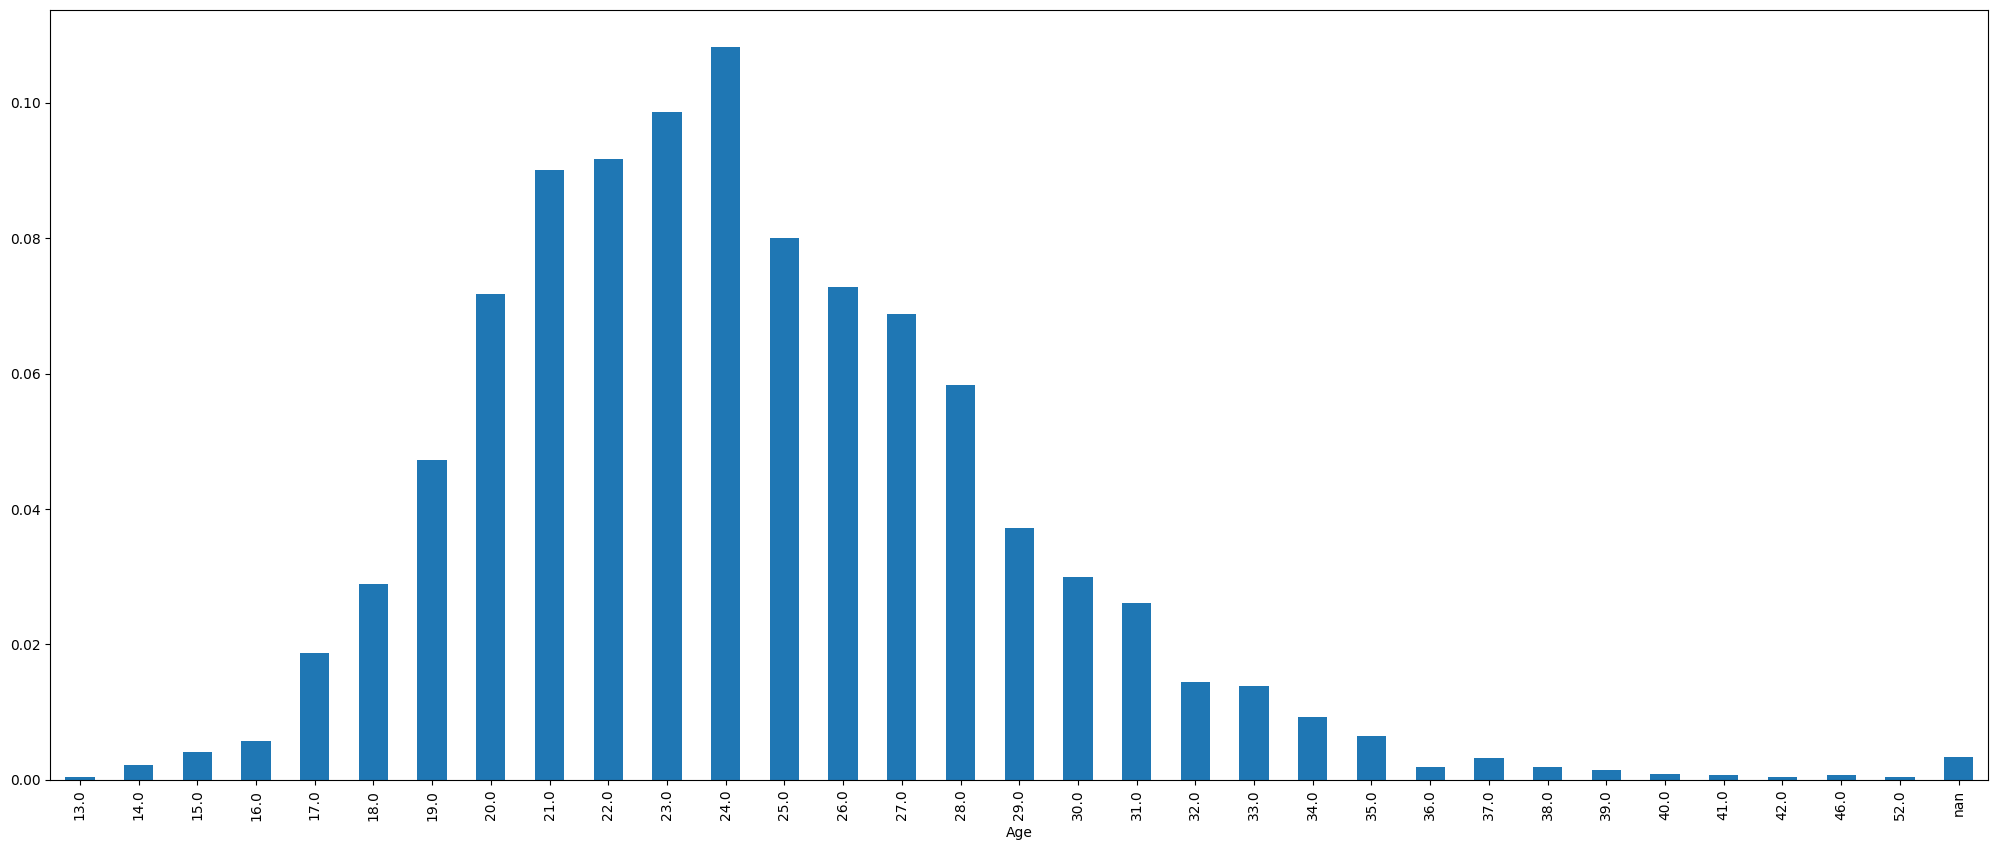

In [33]:
speed_skating_df['Age'].value_counts('Age', dropna=False).sort_index().plot.bar(figsize=(25,10))

Тут есть противоречивые данные в виде возраста 13-14 лет. Это выглядит странно, так как во всех источниках указываеться что минимальный возраст участия - 15 лет. Попробуем найти этих участников

In [34]:
speed_skating_df[speed_skating_df['Age'] < 15].sort_index()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
12379,6723,Baeg Eun-Bi,F,14.0,158.0,52.0,South Korea,KOR,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 3,000 metres",NaN
35933,18459,"Helen Constance ""Connie"" Carpenter-Phinney",F,14.0,178.0,59.0,United States,USA,1972 Winter,1972,Winter,Sapporo,Speed Skating,"Speed Skating Women's 1,500 metres",NaN
83113,42223,James Edward Graeffe,M,14.0,NaN,NaN,Belgium,BEL,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Speed Skating,Speed Skating Men's 500 metres,NaN
83114,42223,James Edward Graeffe,M,14.0,NaN,NaN,Belgium,BEL,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Speed Skating,"Speed Skating Men's 1,500 metres",NaN
83115,42223,James Edward Graeffe,M,14.0,NaN,NaN,Belgium,BEL,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Speed Skating,"Speed Skating Men's 5,000 metres",NaN
134941,67898,Lee Gyeong-Hui,F,13.0,162.0,50.0,South Korea,KOR,1972 Winter,1972,Winter,Sapporo,Speed Skating,Speed Skating Women's 500 metres,NaN
134942,67898,Lee Gyeong-Hui,F,13.0,162.0,50.0,South Korea,KOR,1972 Winter,1972,Winter,Sapporo,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
135297,68078,Lee Nam-Sun,F,14.0,164.0,62.0,South Korea,KOR,1976 Winter,1976,Winter,Innsbruck,Speed Skating,Speed Skating Women's 500 metres,NaN
135298,68078,Lee Nam-Sun,F,14.0,164.0,62.0,South Korea,KOR,1976 Winter,1976,Winter,Innsbruck,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
135299,68078,Lee Nam-Sun,F,14.0,164.0,62.0,South Korea,KOR,1976 Winter,1976,Winter,Innsbruck,Speed Skating,"Speed Skating Women's 1,500 metres",NaN


Ссылки на статьи о данных участниках:

https://en.wikipedia.org/wiki/Marzia_Peretti

https://en.wikipedia.org/wiki/Kay_Lunda

https://en.wikipedia.org/wiki/Lee_Nam-sun

https://en.wikipedia.org/wiki/Baek_Eun-bi

https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D1%80%D0%BF%D0%B5%D0%BD%D1%82%D0%B5%D1%80-%D0%A4%D0%B8%D0%BD%D0%BD%D0%B8,_%D0%9A%D0%BE%D0%BD%D0%BD%D0%B8

https://en.wikipedia.org/wiki/James_Graeffe

https://en.wikipedia.org/wiki/Lee_Gyeong-hui

Участник Baeg Eun-Bi по открытой информации участвовал несколько раз в ОИ, но тут представлен как один. Попробуем найти его в выборке

In [35]:
speed_skating_df[speed_skating_df['Name'] == 'Baeg Eun-Bi'].sort_index()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
12379,6723,Baeg Eun-Bi,F,14.0,158.0,52.0,South Korea,KOR,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 3,000 metres",NaN
12380,6723,Baeg Eun-Bi,F,18.0,158.0,52.0,South Korea,KOR,1998 Winter,1998,Winter,Nagano,Speed Skating,"Speed Skating Women's 1,500 metres",NaN
12381,6723,Baeg Eun-Bi,F,18.0,158.0,52.0,South Korea,KOR,1998 Winter,1998,Winter,Nagano,Speed Skating,"Speed Skating Women's 3,000 metres",NaN
12382,6723,Baeg Eun-Bi,F,22.0,158.0,52.0,South Korea,KOR,2002 Winter,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Women's 1,500 metres",NaN
12383,6723,Baeg Eun-Bi,F,22.0,158.0,52.0,South Korea,KOR,2002 Winter,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Women's 3,000 metres",NaN


Информация по данному участнику верна

По остальным участникам ифнормация верна, можно проверить ссылки 

In [36]:
speed_skating_df[speed_skating_df['Age'] > 50].sort_index()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
237266,118995,Albert Edward Tebbit,M,52.0,NaN,NaN,Great Britain,GBR,1924 Winter,1924,Winter,Chamonix,Speed Skating,"Speed Skating Men's 5,000 metres",NaN
237267,118995,Albert Edward Tebbit,M,52.0,NaN,NaN,Great Britain,GBR,1924 Winter,1924,Winter,Chamonix,Speed Skating,Speed Skating Men's Allround,NaN


https://en.wikipedia.org/wiki/Albert_Tebbit

Информация верна

## Рост

In [37]:
speed_skating_df['Height'].value_counts('Height', dropna=False).sort_index()

Height
149.0    0.000356
151.0    0.000178
152.0    0.001425
153.0    0.004098
154.0    0.001247
155.0    0.001425
156.0    0.004632
157.0    0.006414
158.0    0.008017
159.0    0.007483
160.0    0.022270
161.0    0.004988
162.0    0.021735
163.0    0.016391
164.0    0.017816
165.0    0.024586
166.0    0.014253
167.0    0.041867
168.0    0.038126
169.0    0.017459
170.0    0.046321
171.0    0.025298
172.0    0.035097
173.0    0.033850
174.0    0.022804
175.0    0.040620
176.0    0.015143
177.0    0.016747
178.0    0.042402
179.0    0.011402
180.0    0.055585
181.0    0.021023
182.0    0.029574
183.0    0.034563
184.0    0.014965
185.0    0.029396
186.0    0.011937
187.0    0.010868
188.0    0.012649
189.0    0.013184
190.0    0.017281
191.0    0.001069
192.0    0.004098
193.0    0.002672
194.0    0.000178
197.0    0.001069
199.0    0.000713
200.0    0.000356
203.0    0.000178
NaN      0.194192
Name: proportion, dtype: float64

<Axes: xlabel='Height'>

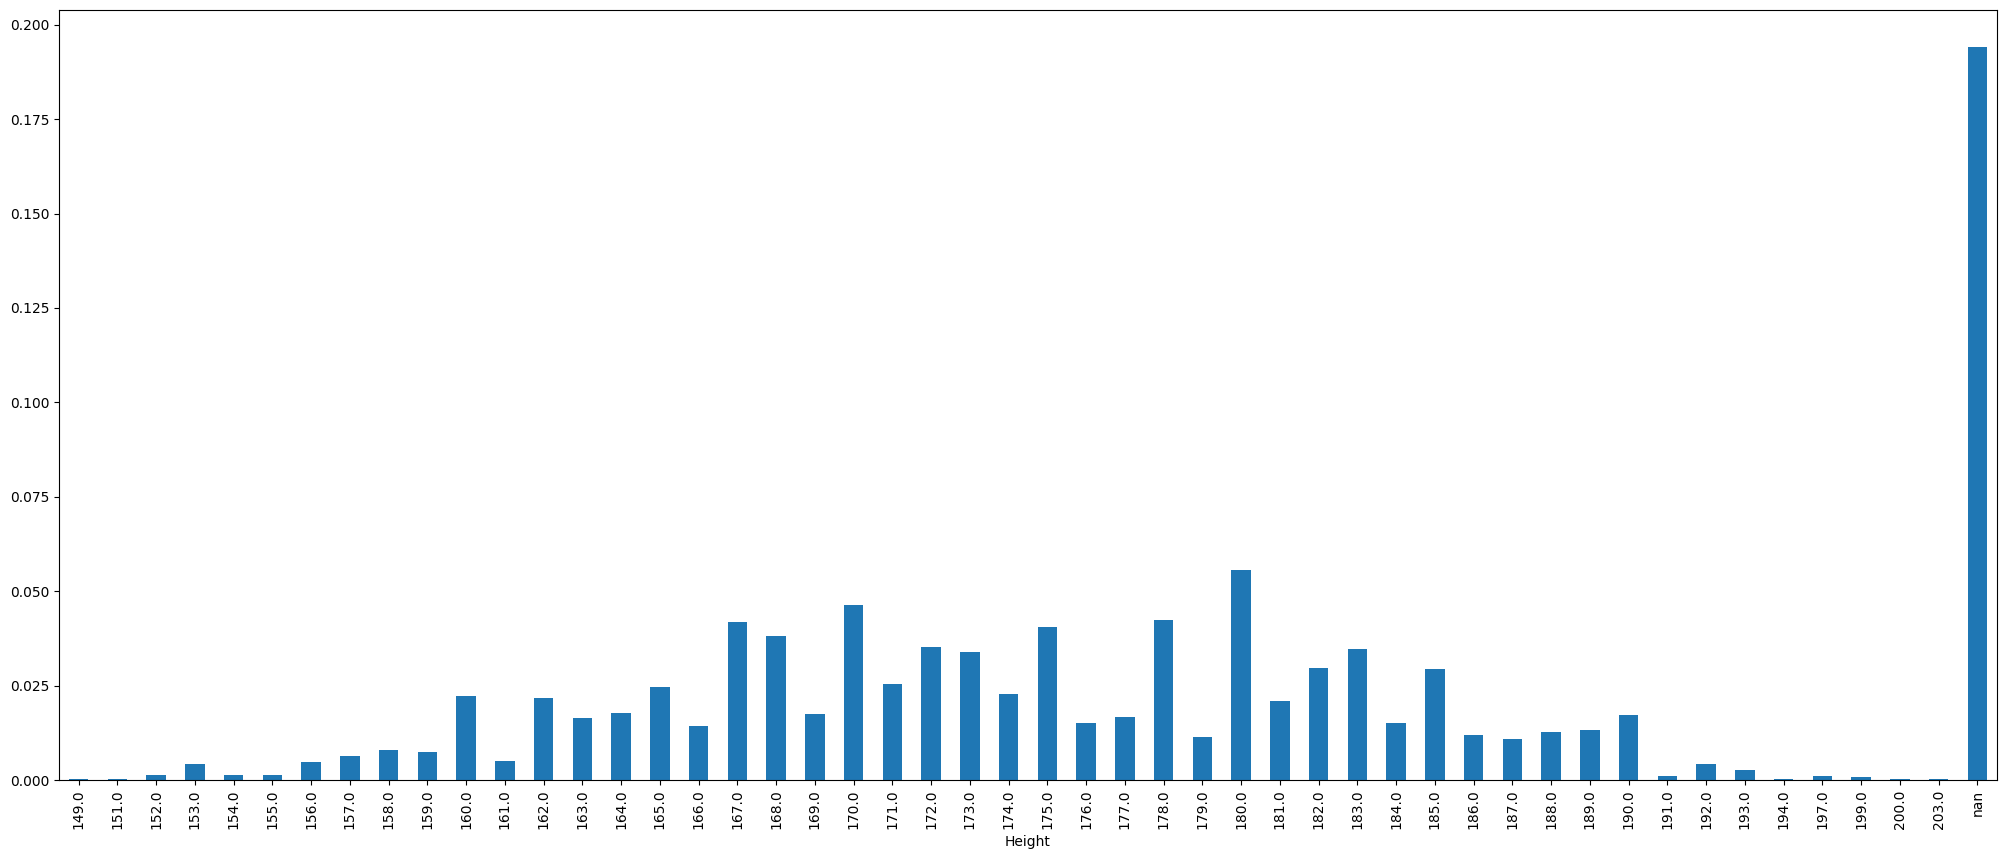

In [38]:
speed_skating_df['Height'].value_counts('Height', dropna=False).sort_index().plot.bar(figsize=(25,10))

В данной выборке все данные корректны (за исключением NAN)

In [39]:
speed_skating_df[speed_skating_df['Height'] > 200]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
213653,107290,Roger Robert Schneider,M,26.0,203.0,100.0,Switzerland,SUI,2010 Winter,2010,Winter,Vancouver,Speed Skating,"Speed Skating Men's 5,000 metres",NaN


https://www.olympedia.org/athletes/119715

## Вес

In [40]:
speed_skating_df['Weight'].value_counts('Weight', dropna=False).sort_index()

Weight
46.0     0.001425
47.0     0.000713
48.0     0.002138
49.0     0.000356
50.0     0.004276
51.0     0.005345
52.0     0.008017
53.0     0.004098
54.0     0.005701
55.0     0.008908
56.0     0.016391
57.0     0.023695
58.0     0.029574
59.0     0.021557
59.5     0.001247
60.0     0.024051
61.0     0.026367
62.0     0.026367
63.0     0.024051
64.0     0.020132
65.0     0.030465
65.5     0.000356
66.0     0.029931
67.0     0.020310
68.0     0.022626
69.0     0.010868
70.0     0.041511
71.0     0.019241
72.0     0.033672
73.0     0.024764
74.0     0.017281
75.0     0.044896
75.5     0.000713
76.0     0.021379
77.0     0.020666
78.0     0.024942
79.0     0.016925
80.0     0.034741
81.0     0.008552
82.0     0.022626
83.0     0.008373
84.0     0.012471
85.0     0.023517
86.0     0.007839
87.0     0.003207
88.0     0.009264
89.0     0.001782
90.0     0.009086
91.0     0.000356
92.0     0.003029
93.0     0.003029
95.0     0.002138
96.0     0.001603
97.0     0.000891
100.0    0.000178
NaN

<Axes: xlabel='Weight'>

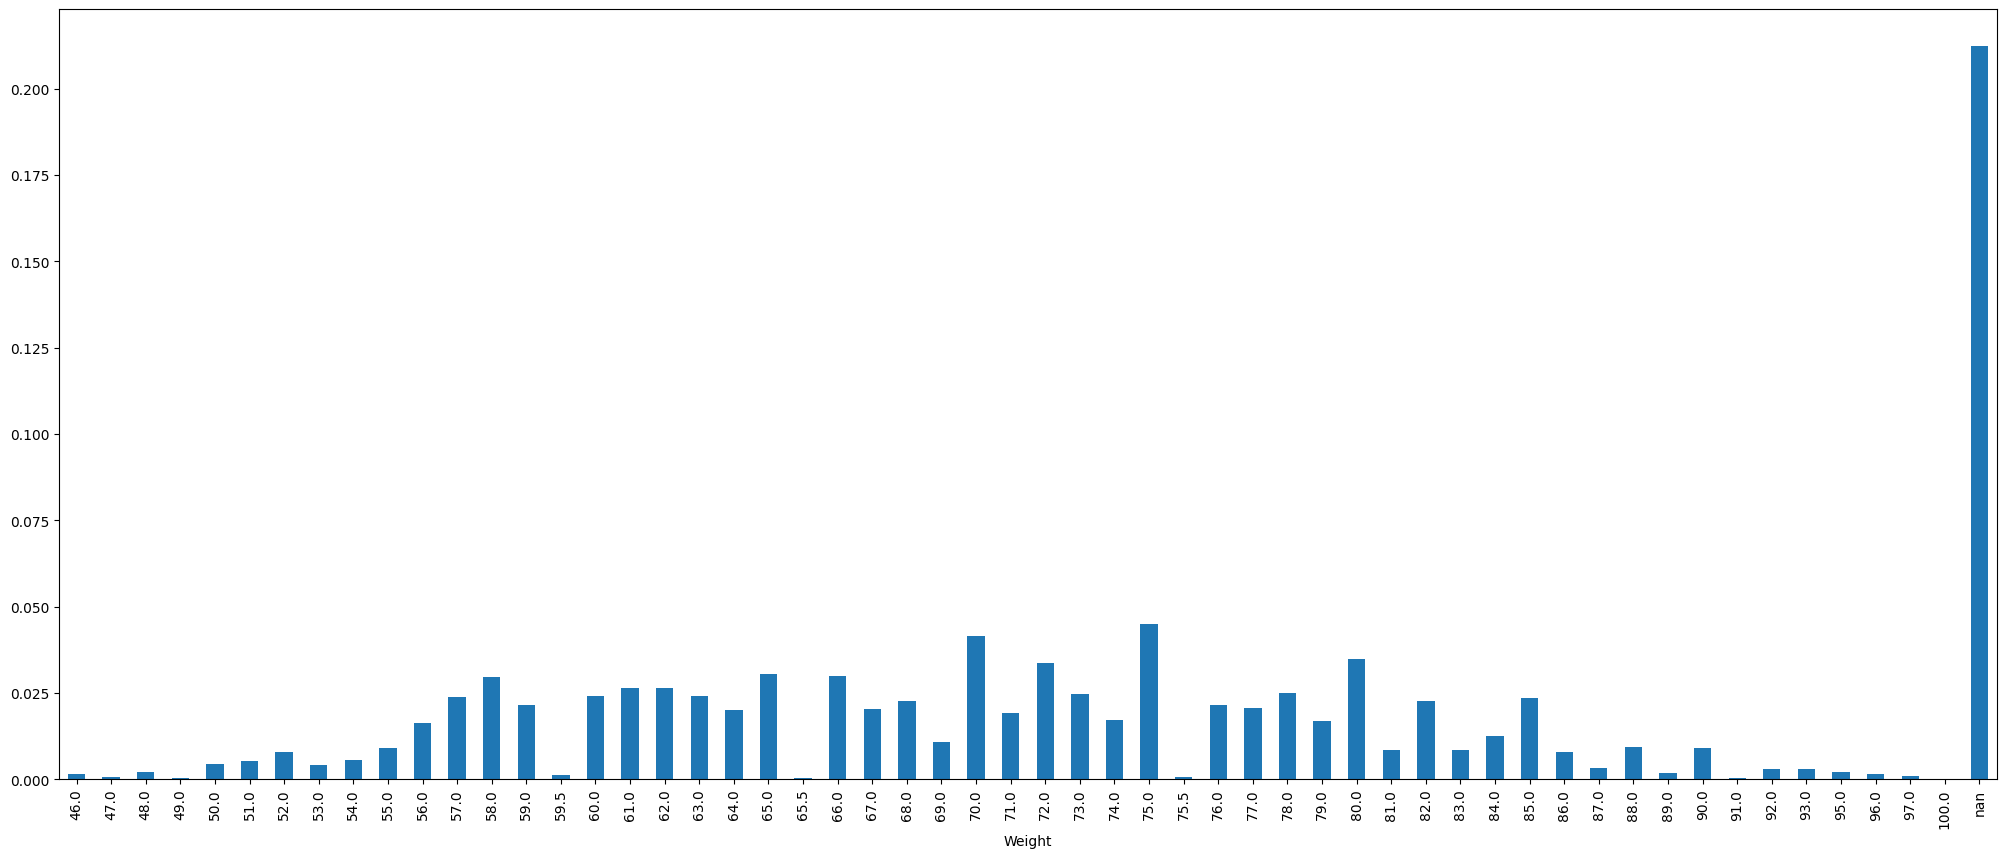

In [41]:
speed_skating_df['Weight'].value_counts('Weight', dropna=False).sort_index().plot.bar(figsize=(25,10))

Тут все данные соответствуют действительности

# Обработка пропусков

In [42]:
speed_skating_df.isna().mean().sort_values(ascending=False)

Medal     0.896668
Weight    0.212364
Height    0.194192
Age       0.003385
ID        0.000000
Name      0.000000
Sex       0.000000
Team      0.000000
NOC       0.000000
Games     0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
dtype: float64

## Возраст

In [44]:
speed_skating_df[speed_skating_df['Age'].isna()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
56232,28806,"Frederick William ""Fred"" Dix",M,NaN,178.0,74.0,Great Britain,GBR,1924 Winter,1924,Winter,Chamonix,Speed Skating,Speed Skating Men's 500 metres,NaN
56233,28806,"Frederick William ""Fred"" Dix",M,NaN,178.0,74.0,Great Britain,GBR,1924 Winter,1924,Winter,Chamonix,Speed Skating,Speed Skating Men's Allround,NaN
56234,28806,"Frederick William ""Fred"" Dix",M,NaN,178.0,74.0,Great Britain,GBR,1928 Winter,1928,Winter,Sankt Moritz,Speed Skating,Speed Skating Men's 500 metres,NaN
56235,28806,"Frederick William ""Fred"" Dix",M,NaN,178.0,74.0,Great Britain,GBR,1928 Winter,1928,Winter,Sankt Moritz,Speed Skating,"Speed Skating Men's 1,500 metres",NaN
56236,28806,"Frederick William ""Fred"" Dix",M,NaN,178.0,74.0,Great Britain,GBR,1928 Winter,1928,Winter,Sankt Moritz,Speed Skating,"Speed Skating Men's 5,000 metres",NaN
89832,45516,Oldich Han,M,NaN,NaN,NaN,Czechoslovakia,TCH,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Speed Skating,Speed Skating Men's 500 metres,NaN
89833,45516,Oldich Han,M,NaN,NaN,NaN,Czechoslovakia,TCH,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Speed Skating,"Speed Skating Men's 1,500 metres",NaN
89834,45516,Oldich Han,M,NaN,NaN,NaN,Czechoslovakia,TCH,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Speed Skating,"Speed Skating Men's 5,000 metres",NaN
106007,53625,Jang In-Won,M,NaN,NaN,NaN,South Korea,KOR,1960 Winter,1960,Winter,Squaw Valley,Speed Skating,"Speed Skating Men's 1,500 metres",NaN
106008,53625,Jang In-Won,M,NaN,NaN,NaN,South Korea,KOR,1960 Winter,1960,Winter,Squaw Valley,Speed Skating,"Speed Skating Men's 5,000 metres",NaN


Участников не много, можно найти возраст каждого, чтобы не потерять нужные данные

https://yandex.ru/search/?text=Frederick+William+%22Fred%22+Dix&clid=2411726&lr=67 
Frederick William "Fred" Dix - родился в 1883 - можно найи возраст участия

In [45]:
user_df = speed_skating_df[speed_skating_df['Name'] == 'Frederick William "Fred" Dix']
for index, row in user_df.iterrows():
    speed_skating_df.loc[index, 'Age'] = speed_skating_df.loc[index, 'Year'] - 1883

In [46]:
user_df = speed_skating_df[speed_skating_df['Name'] == 'Oldich Han']
for index, row in user_df.iterrows():
    speed_skating_df.loc[index, 'Age'] = speed_skating_df.loc[index, 'Year'] - 1915

In [47]:
user_df = speed_skating_df[speed_skating_df['Name'] == 'Jang In-Won']
for index, row in user_df.iterrows():
    speed_skating_df.loc[index, 'Age'] = speed_skating_df.loc[index, 'Year'] - 1936

In [48]:
user_df = speed_skating_df[speed_skating_df['Name'] == 'Arvds Lejnieks']
for index, row in user_df.iterrows():
    speed_skating_df.loc[index, 'Age'] = speed_skating_df.loc[index, 'Year'] - 1913

In [49]:
user_df = speed_skating_df[speed_skating_df['Name'] == 'Gaston Van Hazebroeck']
for index, row in user_df.iterrows():
    speed_skating_df.loc[index, 'Age'] = speed_skating_df.loc[index, 'Year'] - 1904

In [50]:
user_df = speed_skating_df[speed_skating_df['Name'] == 'Boris Yakimov']
for index, row in user_df.iterrows():
    speed_skating_df.loc[index, 'Age'] = speed_skating_df.loc[index, 'Year'] - 1932

Все данные можно найти в открытом доступе

In [51]:
len(speed_skating_df[speed_skating_df['Age'].isna()])

0

## Рост

In [52]:
len(speed_skating_df[speed_skating_df['Height'].isna()])

1090

Данных много и в ручном способе не получиться их изменить. Изменим все пропуски среднем значением

In [53]:
speed_skating_df["Height"].fillna((speed_skating_df["Height"].mean()), inplace = True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_25964\1536285421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speed_skating_df["Height"].fillna((speed_skating_df["Height"].mean()), inplace = True)


In [54]:
len(speed_skating_df[speed_skating_df['Height'].isna()])

0

<Axes: xlabel='Height'>

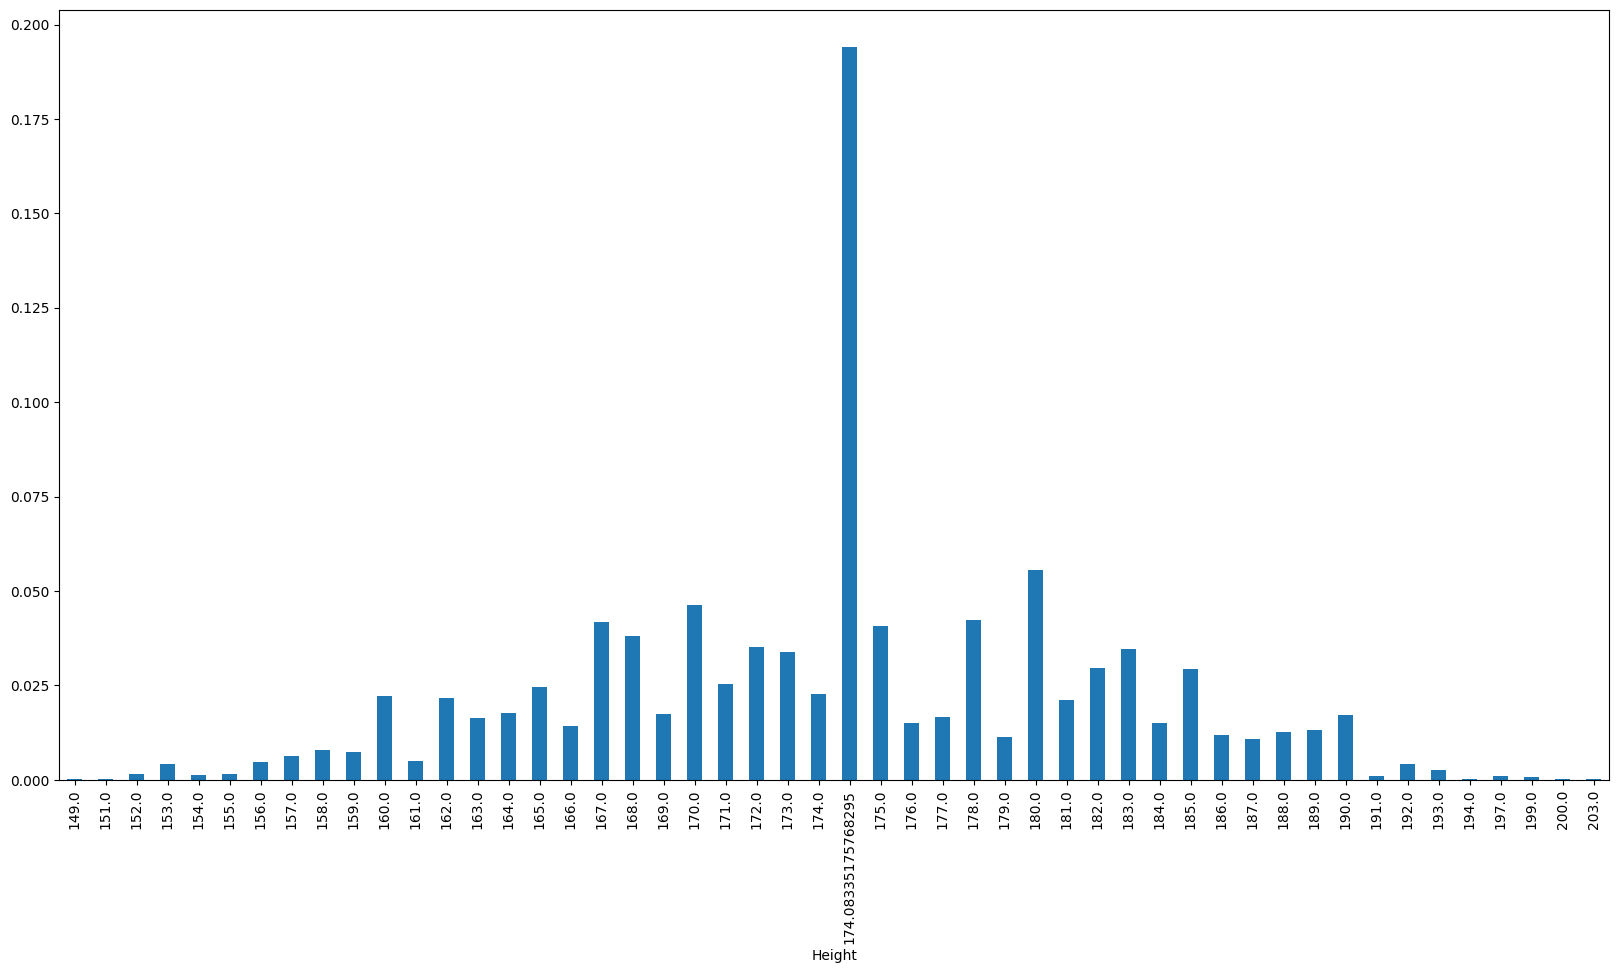

In [55]:
speed_skating_df['Height'].value_counts('Height', dropna=False).sort_index().plot.bar(figsize=(20,10))

## Вес

In [56]:
len(speed_skating_df[speed_skating_df['Weight'].isna()])

1192

In [57]:
speed_skating_df["Weight"].fillna((speed_skating_df["Weight"].mean()), inplace = True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_25964\3571931037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speed_skating_df["Weight"].fillna((speed_skating_df["Weight"].mean()), inplace = True)


In [58]:
len(speed_skating_df[speed_skating_df['Weight'].isna()])

0

<Axes: xlabel='Weight'>

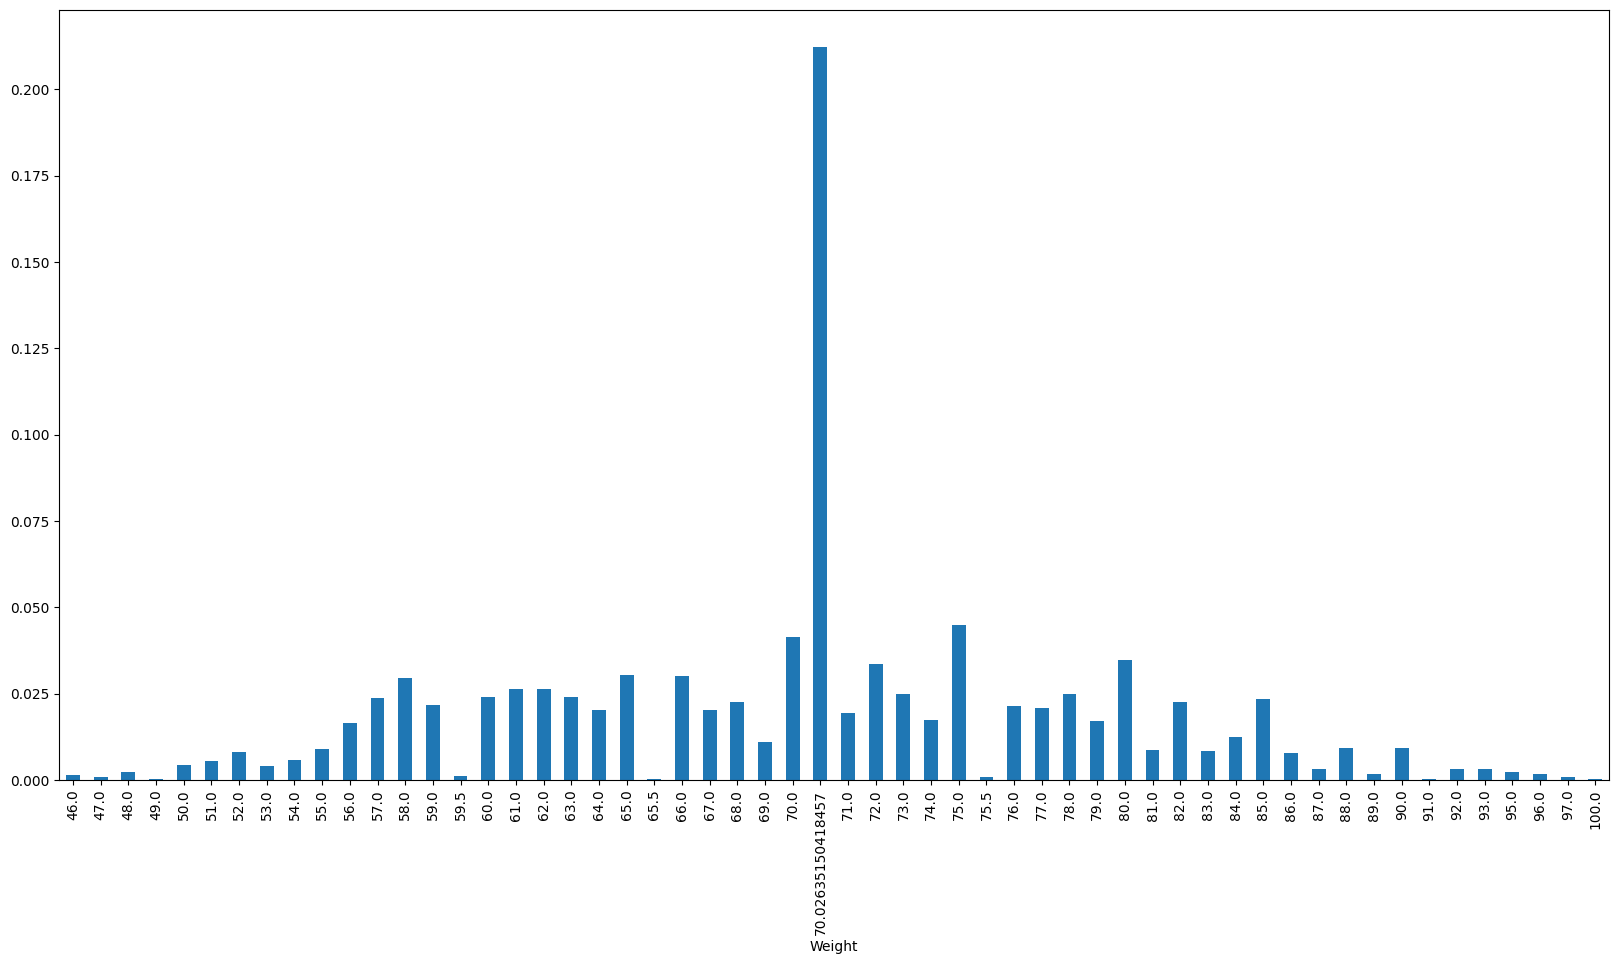

In [59]:
speed_skating_df['Weight'].value_counts('Weight', dropna=False).sort_index().plot.bar(figsize=(20,10))

## Медали

In [60]:
speed_skating_df['Medal'].fillna('No Medal', inplace = True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_25964\943974189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speed_skating_df['Medal'].fillna('No Medal', inplace = True)


In [61]:
len(speed_skating_df[speed_skating_df['Medal'].isna()])

0

In [62]:
speed_skating_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271094,135559,Pawe Jan Zygmunt,M,25.0,182.0,79.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,"Speed Skating Men's 1,500 metres",No Medal
271095,135559,Pawe Jan Zygmunt,M,25.0,182.0,79.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,"Speed Skating Men's 5,000 metres",No Medal
271096,135559,Pawe Jan Zygmunt,M,29.0,182.0,79.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Men's 5,000 metres",No Medal
271097,135559,Pawe Jan Zygmunt,M,29.0,182.0,79.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Men's 10,000 metres",No Medal


# Цифровизация данных

Для дальнейшего предсказания нужды данные в числовом формате. Возьмем столбцы рост, вес, возраст и медаль для нашего предсказания. Переведем их в числовой формат.

<Axes: xlabel='Event'>

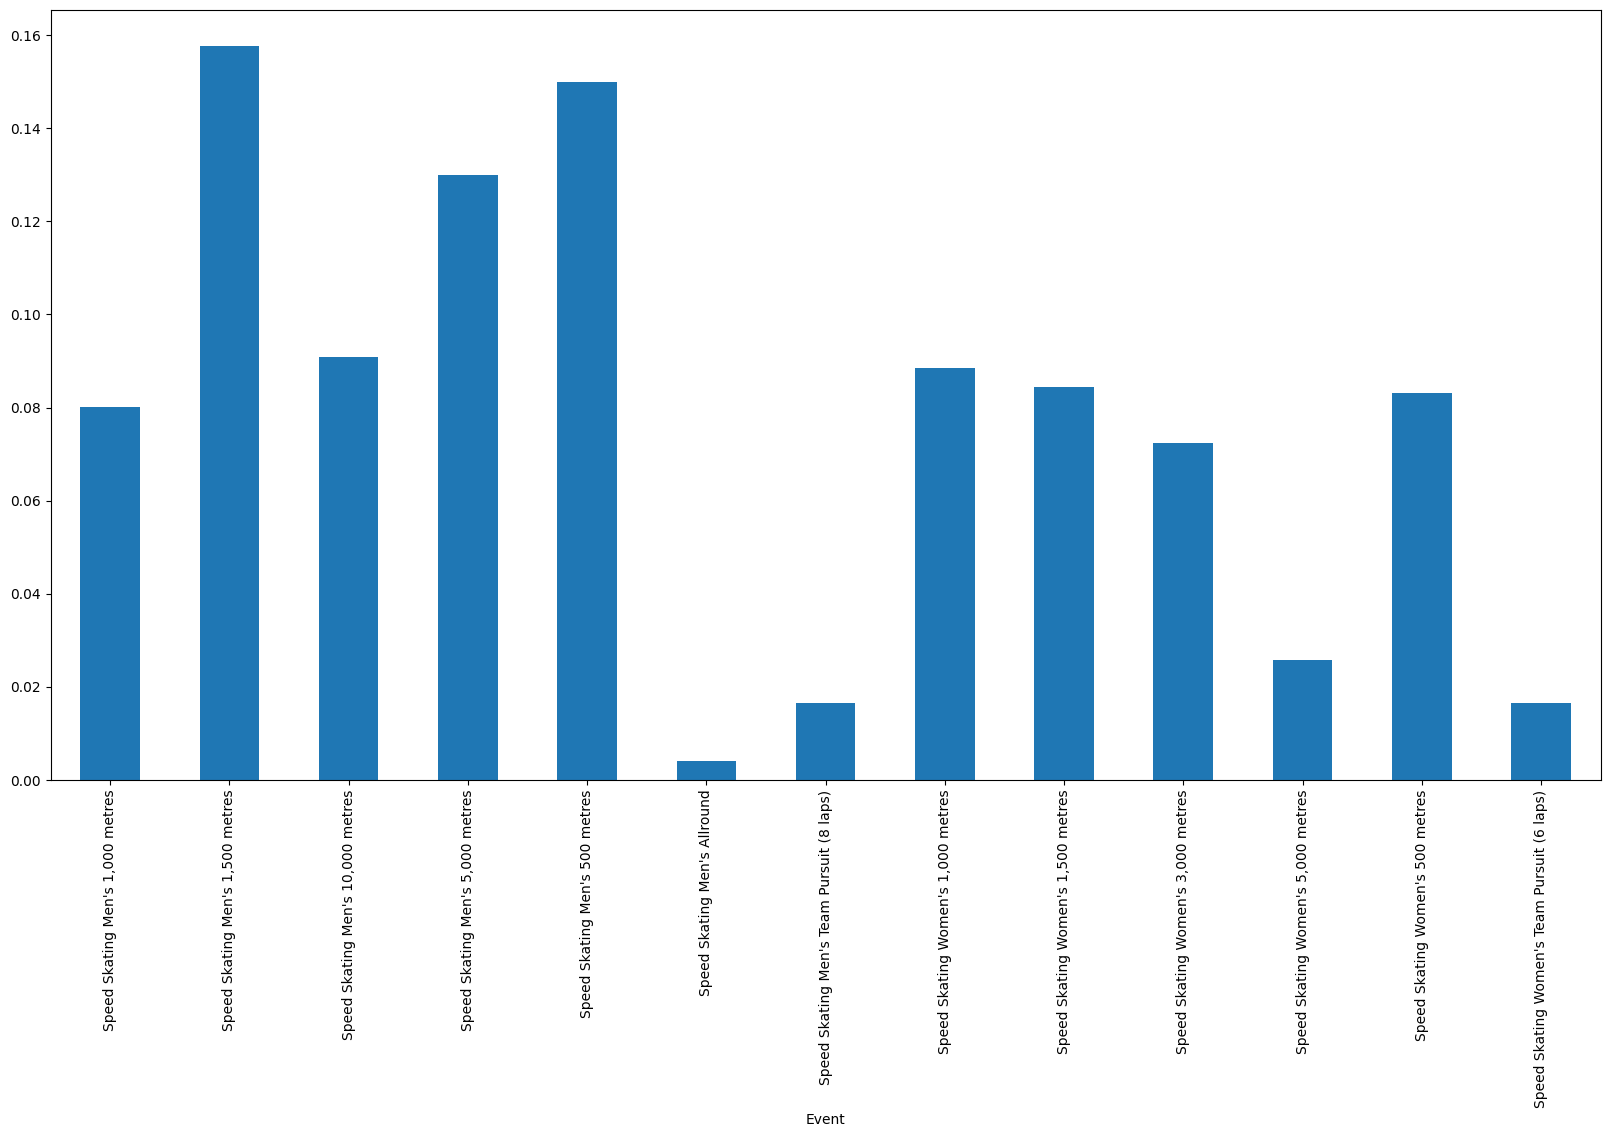

In [63]:
speed_skating_df['Event'].value_counts('Event', dropna=False).sort_index().plot.bar(figsize=(20,10))

In [64]:
sk_500_w_df = speed_skating_df[speed_skating_df['Event'] == "Speed Skating Women's 500 metres"]
sk_500_m_df = speed_skating_df[speed_skating_df['Event'] == "Speed Skating Men's 500 metres"]

In [65]:
sk_500_w_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No Medal
6394,3590,An Ji-Min,F,17.0,163.0,52.0,South Korea,KOR,2010 Winter,2010,Winter,Vancouver,Speed Skating,Speed Skating Women's 500 metres,No Medal
7799,4323,Monique Angermller,F,26.0,174.0,72.0,Germany,GER,2010 Winter,2010,Winter,Vancouver,Speed Skating,Speed Skating Women's 500 metres,No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268770,134463,Zhang Hong,F,25.0,174.0,65.0,China,CHN,2014 Winter,2014,Winter,Sochi,Speed Skating,Speed Skating Women's 500 metres,No Medal
268923,134545,Zhang Shuang,F,23.0,172.0,70.0,China,CHN,2010 Winter,2010,Winter,Vancouver,Speed Skating,Speed Skating Women's 500 metres,No Medal
268924,134545,Zhang Shuang,F,27.0,172.0,70.0,China,CHN,2014 Winter,2014,Winter,Sochi,Speed Skating,Speed Skating Women's 500 metres,No Medal
270221,135185,Pamela Zoellner (Fischer-),F,29.0,177.0,69.0,Germany,GER,2006 Winter,2006,Winter,Torino,Speed Skating,Speed Skating Women's 500 metres,No Medal


In [333]:
sk_500_m_df

,Age,Height,Weight,Medal
83,24.0,174.083352,70.026352,No Medal
997,21.0,183.000000,84.000000,No Medal
999,27.0,183.000000,84.000000,No Medal
1001,31.0,183.000000,84.000000,No Medal
1601,19.0,185.000000,75.000000,No Medal
...,...,...,...,...
269877,25.0,185.000000,80.000000,No Medal
269878,29.0,185.000000,80.000000,No Medal
269988,25.0,182.000000,80.000000,No Medal
270282,24.0,174.083352,70.026352,No Medal


In [334]:
sk_500_w_df = sk_500_w_df[['Age', 'Height', 'Weight', 'Medal']] 

In [335]:
sk_500_w_df

,Age,Height,Weight,Medal
4,21.0,185.0,82.0,No Medal
6,25.0,185.0,82.0,No Medal
8,27.0,185.0,82.0,No Medal
6394,17.0,163.0,52.0,No Medal
7799,26.0,174.0,72.0,No Medal
...,...,...,...,...
268770,25.0,174.0,65.0,No Medal
268923,23.0,172.0,70.0,No Medal
268924,27.0,172.0,70.0,No Medal
270221,29.0,177.0,69.0,No Medal


In [336]:
sk_500_m_df = sk_500_m_df[['Age', 'Height', 'Weight', 'Medal']] 

In [337]:
sk_500_m_df

,Age,Height,Weight,Medal
83,24.0,174.083352,70.026352,No Medal
997,21.0,183.000000,84.000000,No Medal
999,27.0,183.000000,84.000000,No Medal
1001,31.0,183.000000,84.000000,No Medal
1601,19.0,185.000000,75.000000,No Medal
...,...,...,...,...
269877,25.0,185.000000,80.000000,No Medal
269878,29.0,185.000000,80.000000,No Medal
269988,25.0,182.000000,80.000000,No Medal
270282,24.0,174.083352,70.026352,No Medal


In [338]:
def digitalize(df: pd.core.frame.DataFrame):
    digit_df = df.copy()
    obj_columns = digit_df.select_dtypes(include=['object']).columns
    for feat in obj_columns:
        digit_df[feat] = pd.factorize(digit_df[feat])[0]
    return digit_df

In [339]:
sk_500_m_df_f = digitalize(sk_500_m_df)
sk_500_w_df_f = digitalize(sk_500_w_df)

In [340]:
sk_500_m_df_f

,Age,Height,Weight,Medal
83,24.0,174.083352,70.026352,0
997,21.0,183.000000,84.000000,0
999,27.0,183.000000,84.000000,0
1001,31.0,183.000000,84.000000,0
1601,19.0,185.000000,75.000000,0
...,...,...,...,...
269877,25.0,185.000000,80.000000,0
269878,29.0,185.000000,80.000000,0
269988,25.0,182.000000,80.000000,0
270282,24.0,174.083352,70.026352,0


# Корреляция

In [341]:
df_true_medal = sk_500_m_df_f[(sk_500_m_df_f['Medal'] != 0)]
df_true_medal

,Age,Height,Weight,Medal
10833,23.0,174.083352,70.026352,1
13465,31.0,180.000000,70.026352,2
15338,27.0,174.083352,70.026352,3
25924,24.0,184.000000,92.000000,3
26777,25.0,171.000000,72.000000,1
...,...,...,...,...
239104,26.0,181.000000,77.000000,3
239745,30.0,167.000000,67.000000,1
239750,34.0,167.000000,67.000000,2
263063,21.0,190.000000,85.000000,3


In [342]:
correlation_matrix = df_true_medal.corr()
correlation_matrix

,Age,Height,Weight,Medal
Age,1.000000,-0.068238,-0.036475,0.225416
Height,-0.068238,1.000000,0.786992,0.116923
Weight,-0.036475,0.786992,1.000000,0.083732
Medal,0.225416,0.116923,0.083732,1.000000


<Axes: >

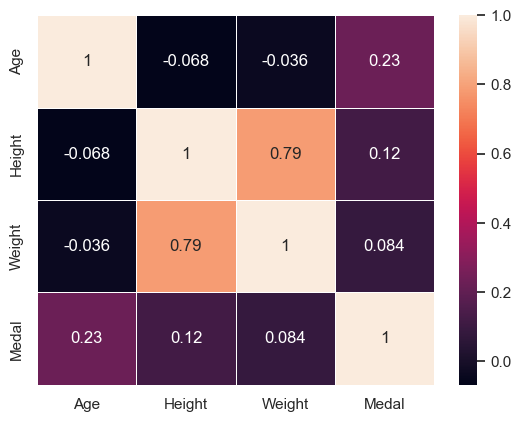

In [343]:
sns.set_theme()
sns.heatmap(correlation_matrix, annot=True, linewidths=.5)

# Создание тестовой и тренировочной выборки

---
Указание параметра медали как три значения

In [385]:
features = sk_500_m_df_f[['Height', 'Weight', 'Age']]
target = sk_500_m_df_f['Medal']

In [380]:
from sklearn.model_selection import train_test_split

In [381]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [382]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((673, 3), (169, 3), (673,), (169,))

---
Указание параметра медали как одно значение (только для призеров)

In [388]:
df_tru_medal_v2 = sk_500_m_df_f.copy()
df_tru_medal_v2 = df_tru_medal_v2[df_tru_medal_v2['Medal'] != 0]
df_tru_medal_v2['Medal'] = df_tru_medal_v2['Medal'].map({1: 0, 2: 1, 3: 0}).fillna(0)
features_v2 = df_tru_medal_v2[['Height', 'Weight', 'Age']]
target_v2 = df_tru_medal_v2['Medal']

In [389]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(features_v2, target_v2, test_size=0.2, random_state=42)
X_train_v2.shape, X_test_v2.shape, y_train_v2.shape, y_test_v2.shape, 

((57, 3), (15, 3), (57,), (15,))

---
Указание параметра медали как одно значение для всех медалистов

In [456]:
df_tru_medal_v3 = sk_500_m_df_f.copy()
df_tru_medal_v3['Medal'] = df_tru_medal_v3['Medal'].map({1: 1, 2: 1, 3: 1}).fillna(0)
features_v3 = df_tru_medal_v3[['Height', 'Weight', 'Age']]
target_v3 = df_tru_medal_v3['Medal']

In [457]:
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = train_test_split(features_v3, target_v3, test_size=0.2, random_state=42)
X_train_v3.shape, X_test_v3.shape, y_train_v3.shape, y_test_v3.shape, 

((673, 3), (169, 3), (673,), (169,))

## Модель

In [417]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble  import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.utils import check_array
import numpy.ma as ma
import numpy as np

In [458]:
model = LinearRegression()
model.fit(X_train, y_train)

model_v2 = LinearRegression()
model_v2.fit(X_train_v2, y_train_v2)

model_v3 = LinearRegression()
model_v3.fit(X_train_v3, y_train_v3)

model_forest = RandomForestClassifier(random_state=42)
model_forest.fit(X_train, y_train)

model_forest_v2 = RandomForestClassifier(random_state=42)
model_forest_v2.fit(X_train_v2, y_train_v2)

model_forest_v3 = RandomForestClassifier(random_state=42)
model_forest_v3.fit(X_train_v3, y_train_v3)

RandomForestClassifier(random_state=42)

# Пресказание

In [392]:
sk_500_m_df_f['Medal'].value_counts(normalize=True, dropna=False)

Medal
0    0.914489
3    0.030879
1    0.027316
2    0.027316
Name: proportion, dtype: float64

In [393]:
sk_500_m_df['Medal'].value_counts(normalize=True, dropna=False)

Medal
No Medal    0.914489
Silver      0.030879
Bronze      0.027316
Gold        0.027316
Name: proportion, dtype: float64

In [470]:
prediction_1 = model.predict(X_test)
prediction_2 = model_forest.predict(X_test)
accuracy_for = accuracy_score(y_test, prediction_2)

print("Точность предсказаний среди всех участников (с указанием трех типов медалей)")
print("Точность (по случайному лесу):", accuracy_for)
print(classification_report(y_test, prediction_2))

prediction_1_v2 = model_v2.predict(X_test_v2)
prediction_2_v2 = model_forest_v2.predict(X_test_v2)
accuracy_2_v2 = accuracy_score(y_test_v2, prediction_2_v2)

print("\nТочность предсказаний среди призеров (с указанием медали как одно значение только для призеров")
print("Точность (по случайному лесу):", accuracy_2_v2)
print(classification_report(y_test_v2, prediction_2_v2))

prediction_1_v3 = model_v3.predict(X_test_v3)
prediction_2_v3= model_forest_v3.predict(X_test_v3)
accuracy_2_v3 = accuracy_score(y_test_v3, prediction_2_v3)

print("\nТочность предсказаний среди призеров (с указанием медали как одно значение для всех участников)")
print("Точность (по случайному лесу):", accuracy_2_v3)
print(classification_report(y_test_v3, prediction_2_v3))

Точность предсказаний среди всех участников (с указанием трех типов медалей)
Точность (по случайному лесу): 0.8816568047337278
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       151
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5

    accuracy                           0.88       169
   macro avg       0.22      0.25      0.23       169
weighted avg       0.80      0.88      0.84       169


Точность предсказаний среди призеров (с указанием медали как одно значение только для призеров
Точность (по случайному лесу): 0.6666666666666666
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.00      0.00      0.00         4

    accuracy                           0.67        15
   macro avg       0.36      0.45      0.40        15
weighted avg       0

C:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

В результате, модель являеться не точной из-за большого количества участников, у которых нет медалей или из-за, в целом, маленькой выборки значений.
Проделаем предобработку данных повторно и возьмем всех участников мужчин спорта Speed Skating, без указания дистанции (до этого рассматривал дистанция 100 м.)

In [466]:
data_new = main_df.copy()
data_new = data_new[(data_new['Sport'] == "Speed Skating") & (data_new['Sex'] == "M")]
data_new['Medal'] = data_new['Medal'].fillna('No Medal')
data_new = data_new.dropna()
data_new = data_new.drop(['ID', 'Name', 'Team', 'NOC', 'Games', 'City', 'Sport', 'Event', 'Season', 'Sex', 'Year'], axis=1)  # Удаляем ненужные столбцы

data_new['Medal'] = data_new['Medal'].map({'Gold': 1, 'Silver': 2,'Bronze': 3}).fillna(0)

X_new = data_new.drop('Medal', axis=1)
y_new = data_new['Medal']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

model_new = RandomForestClassifier(n_estimators=100, random_state=42)
model_new.fit(X_train_new, y_train_new)

pred_new = model_new.predict(X_test_new)

accuracy_new = accuracy_score(y_test_new, pred_new)
print("Акуратность (точность):", accuracy_new)
print(classification_report(y_test_new, pred_new))

Акуратность (точность): 0.8983739837398373
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       669
         1.0       0.33      0.29      0.31        21
         2.0       0.11      0.04      0.06        24
         3.0       0.33      0.04      0.07        24

    accuracy                           0.90       738
   macro avg       0.43      0.34      0.35       738
weighted avg       0.86      0.90      0.88       738



In [469]:

data_new1 = main_df.copy()
data_new1 = data_new1[(data_new1['Sport'] == "Speed Skating") & (data_new1['Sex'] == "M")]
data_new1['Medal'] = data_new1['Medal'].fillna('No Medal')
data_new1 = data_new1.dropna() 
data_new1 = data_new1.drop(['ID', 'Name', 'Team', 'NOC', 'Games', 'City', 'Sport', 'Event', 'Season', 'Sex', 'Year'], axis=1) 

data_new1['Medal'] = data_new1['Medal'].map({'Gold': 1, 'Silver': 1,'Bronze': 1}).fillna(0)

X_new1 = data_new1.drop('Medal', axis=1)
y_new1 = data_new1['Medal']

X_train_new1, X_test_new1, y_train_new1, y_test_new1 = train_test_split(X_new1, y_new1, test_size=0.2, random_state=42)

model_new1 = RandomForestClassifier(n_estimators=100, random_state=42)
model_new1.fit(X_train_new1, y_train_new1)

pred_new1 = model_new1.predict(X_test_new1)

accuracy_new1 = accuracy_score(y_test_new1, pred_new1)
print("Accuracy:", accuracy_new1)
print(classification_report(y_test_new1, pred_new1))

Accuracy: 0.9085365853658537
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       446
         1.0       0.52      0.35      0.42        46

    accuracy                           0.91       492
   macro avg       0.73      0.66      0.68       492
weighted avg       0.90      0.91      0.90       492



В результате, если брать большее количество значений выборки, то модель работает точнее, не переобучаеться, что говорит о важности количества значений выборки и его влияния на конечный результат

# Ответы на вопросы

1.	Сколько лет было самому молодому мужчине и женщине-участникам Олимпийских игр 1992 года?

In [95]:
main_df[main_df['Year'] == 1992][['Name', 'Age', 'Sex']].sort_values('Age')[:10]

,Name,Age,Sex
73461,Carlos Bienvenido Front Barrera,11.0,M
120234,Judit Kiss,12.0,F
120233,Judit Kiss,12.0,F
80831,Gina Elena Gogean (-Groza),13.0,F
265499,"Wei Ling ""Joscelin"" Yeo",13.0,F
265498,"Wei Ling ""Joscelin"" Yeo",13.0,F
265497,"Wei Ling ""Joscelin"" Yeo",13.0,F
102920,Noriko Inada,13.0,F
265496,"Wei Ling ""Joscelin"" Yeo",13.0,F
102919,Noriko Inada,13.0,F


2.	Каков был процент баскетболистов мужского пола среди всех мужчин-участников Олимпийских игр 2012 года? Округлите ответ до первого десятичного знака. Подсказка: здесь и далее при необходимости отбрасывайте дублированных спортсменов, чтобы считать только уникальных

In [96]:
no_dup_df = main_df.drop_duplicates()
count = len(no_dup_df[(no_dup_df['Sex'] == 'M') & (no_dup_df['Sport'] == 'Basketball') & (no_dup_df['Year'] == 2012)])
all_count = len(no_dup_df[(no_dup_df['Sex'] == 'M') & (no_dup_df['Sport'] == 'Basketball')])
round(count/all_count*100, 1)

4.4

3.	Каковы среднее и стандартное отклонение роста теннисисток, участвовавших в Олимпийских играх 2000 года? Округлите ответ до первого десятичного знака.

In [97]:
no_dup_df = main_df.drop_duplicates()
no_dup_df = no_dup_df[no_dup_df['Height'].notna()]

f_tennis_2000_df = no_dup_df[(no_dup_df['Sex'] == 'F') & (no_dup_df['Sport'] == 'Tennis') & (no_dup_df['Year'] == 2000)]
average_height = f_tennis_2000_df['Height'].mean()
std = f_tennis_2000_df['Height'].std()
round(std, 1), average_height

(6.5, 171.792)

4.	Найдите спортсмена, участвовавшего в Олимпийских играх 2006 года, с самым высоким весом среди других участников той же Олимпиады. Каким видом спорта он или она занимался?

In [98]:
no_dup_df = main_df.drop_duplicates()
no_dup_df = no_dup_df[no_dup_df['Weight'].notna()]
players_2006 = no_dup_df[(no_dup_df['Year'] == 2006)].sort_values('Weight')[-1:][['Sport', 'Name', 'Weight', 'Sex']]
players_2006

,Sport,Name,Weight,Sex
8102,Skeleton,Patrick R. Antaki,127.0,M


5.	Сколько раз Джон Ольберг участвовал в Олимпийских играх, проводимых в разные годы?

In [99]:
no_dup_df = main_df.drop_duplicates()
john = len(no_dup_df[(no_dup_df['Name'] == 'John Aalberg')].Year.unique())
john

2

6.	Сколько золотых медалей в теннисе завоевали спортсмены из сборной Швейцарии на Олимпийских играх 2008 года? Посчитайте каждую медаль от каждого спортсмена.

In [100]:
no_dup_df = main_df.drop_duplicates()
players_tennis = len(no_dup_df[(no_dup_df['Year'] == 2008) & (no_dup_df['Team'] == 'Switzerland') & (no_dup_df['Medal'] == 'Gold') & (no_dup_df['Sport'] == 'Tennis')].Name.unique())
players_tennis

2

7.	Правда ли, что Испания завоевала меньше медалей, чем Италия на Олимпийских играх 2016 года? Не учитывайте значения NaN в столбце Медаль

In [101]:
no_dup_df = main_df.drop_duplicates()
no_dup_df = no_dup_df[no_dup_df['Medal'].notna()]
count_players_spain = len(no_dup_df[(no_dup_df['Year'] == 2016) & (no_dup_df['Team'] == 'Spain')])
count_players_italy = len(no_dup_df[(no_dup_df['Year'] == 2016) & (no_dup_df['Team'] == 'Italy')])
count_players_spain < count_players_italy

True

8.	К какой возрастной категории относилось наименьшее количество и наибольшее количество участников Олимпийских игр 2008 года?

In [102]:
no_dup_df = main_df.drop_duplicates()
no_dup_df = no_dup_df[no_dup_df['Age'].notna()]
players_2008 = no_dup_df[(no_dup_df['Year'] == 2008)]
players_2008_before_18 = len(no_dup_df[(no_dup_df['Year'] == 2008) & (no_dup_df['Age'] < 18)])
players_2008_before_34 = len(no_dup_df[(no_dup_df['Year'] == 2008) & (no_dup_df['Age'] < 35) & (no_dup_df['Age'] >= 18)])
players_2008_after_35 = len(no_dup_df[(no_dup_df['Year'] == 2008) & (no_dup_df['Age'] >= 35)])
players_2008_before_18, players_2008_before_34, players_2008_after_35

(500, 12178, 922)

9.	Правда ли, что в Атланте проводились летние Олимпийские игры? Правда ли, что в Скво-Вэлли проводились зимние Олимпийские игры?

In [104]:
no_dup_df = main_df.drop_duplicates()
atlamta_games = len(no_dup_df[(no_dup_df['City'] == 'Atlanta') & (no_dup_df['Season'] == 'Summer')])
atlamta_games > 0

True

In [105]:
no_dup_df = main_df.drop_duplicates()
atlamta_games = len(no_dup_df[(no_dup_df['City'] == 'Squaw Valley') & (no_dup_df['Season'] == 'Winter')])
atlamta_games > 0

True

10.	Какова абсолютная разница между количеством уникальных видов спорта на Олимпийских играх 1986 года и Олимпийских играх 2002 года?

In [106]:
no_dup_df = main_df.drop_duplicates()
games_1986 = len(no_dup_df[(no_dup_df['Year'] == 1986)].Sport.unique())
games_2002 = len(no_dup_df[(no_dup_df['Year'] == 2002)].Sport.unique())
games_1986, games_2002

(0, 15)